In [41]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = "https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv"
data_set = pd.read_csv(url)
data_set.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
data_set.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [8]:
data_set.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


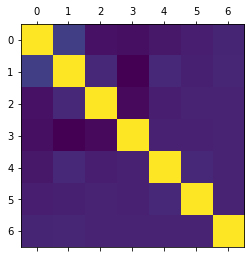

In [10]:
plt.matshow(data_set.corr())
plt.show()

In [12]:
data_set.isnull()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
29518,False,False,False,False,False,False,False,False,False,False,False
29519,False,False,False,False,False,False,False,False,False,False,False
29520,False,False,False,False,False,False,False,False,False,False,False
29521,False,False,False,False,False,False,False,False,False,False,False


In [21]:
data_set.skew()

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [23]:
data_set.kurtosis()

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

In [59]:
D10 = data_set.head(29523)
print(D10)

                     record_id  utility_id_ferc1  report_year  \
0        f1_fuel_1994_12_1_0_7                 1         1994   
1       f1_fuel_1994_12_1_0_10                 1         1994   
2        f1_fuel_1994_12_2_0_1                 2         1994   
3        f1_fuel_1994_12_2_0_7                 2         1994   
4       f1_fuel_1994_12_2_0_10                 2         1994   
...                        ...               ...          ...   
29518  f1_fuel_2018_12_12_0_13                12         2018   
29519   f1_fuel_2018_12_12_1_1                12         2018   
29520  f1_fuel_2018_12_12_1_10                12         2018   
29521  f1_fuel_2018_12_12_1_13                12         2018   
29522  f1_fuel_2018_12_12_1_14                12         2018   

           plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0                  rockport                coal       ton        5377489.0   
1      rockport total plant                coal       ton      

In [61]:
dFilter = D10.filter(['report_year ', 'fuel_type_code_pudl', 'fuel_cost_per_mmbtut'])
print(dFilter)

      fuel_type_code_pudl
0                    coal
1                    coal
2                    coal
3                    coal
4                     gas
...                   ...
29518                 gas
29519                 gas
29520                 gas
29521                coal
29522                 gas

[29523 rows x 1 columns]


In [66]:
D10.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].sum()

fuel_type_code_pudl
coal        576254.381
gas         156891.829
nuclear    4053318.428
oil        1361824.819
other         3048.394
waste         8607.492
Name: fuel_cost_per_unit_burned, dtype: float64

In [71]:
D10.groupby('fuel_cost_per_unit_burned')['report_year'].sum()

fuel_cost_per_unit_burned
-276.080       2000
-174.670       2000
-123.310       2000
-119.040       2003
-85.760        1995
               ... 
 65137.588     2012
 69785.215     2011
 80459.000     2014
 83538.000     2011
 139358.000    2014
Name: report_year, Length: 19416, dtype: int64

In [73]:
D10.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].apply(lambda x:
                                                 100 * x / float(x.sum()))

0        0.003226
1        0.003224
2        0.006893
3        0.008193
4        0.001766
           ...   
29518    0.003047
29519    0.002326
29520    0.003040
29521    0.000531
29522    0.000000
Name: fuel_cost_per_unit_burned, Length: 29523, dtype: float64

In [78]:
D10.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].apply(lambda x:
                                                 100 * x )

0        1859.0
1        1858.0
2        3972.0
3        4721.0
4         277.0
          ...  
29518     478.0
29519     365.0
29520     477.0
29521     306.0
29522       0.0
Name: fuel_cost_per_unit_burned, Length: 29523, dtype: float64

In [81]:
D10.groupby(['fuel_type_code_pudl', 'report_year'])['fuel_cost_per_unit_burned'].sum()

fuel_type_code_pudl  report_year
coal                 1994           14984.572
                     1995           14571.785
                     1996           12694.803
                     1997           43742.178
                     1998           11902.597
                                      ...    
waste                2014             591.594
                     2015             629.270
                     2016             539.079
                     2017             452.079
                     2018             660.972
Name: fuel_cost_per_unit_burned, Length: 148, dtype: float64

In [83]:
D10.groupby('fuel_cost_per_unit_delivered')['report_year'].sum()

fuel_cost_per_unit_delivered
-874.937        2008
-488.054        2007
-313.410        2004
-174.670        6000
-170.187        2015
                ... 
 1942979.000    1997
 2114508.000    1996
 2255688.000    1997
 7793482.000    1996
 7964521.000    1997
Name: report_year, Length: 16675, dtype: int64

In [84]:
D10.groupby('fuel_cost_per_unit_delivered')['report_year'].max()

fuel_cost_per_unit_delivered
-874.937        2008
-488.054        2007
-313.410        2004
-174.670        2000
-170.187        2015
                ... 
 1942979.000    1997
 2114508.000    1996
 2255688.000    1997
 7793482.000    1996
 7964521.000    1997
Name: report_year, Length: 16675, dtype: int64